In [ ]:
#| default_exp others

<a id=top></a>

# Plotting

> Graphical production

## Matplotlib

In [ ]:
#| export
import matplotlib.pyplot as plt

Scatter plotting

In [ ]:
import numpy as np

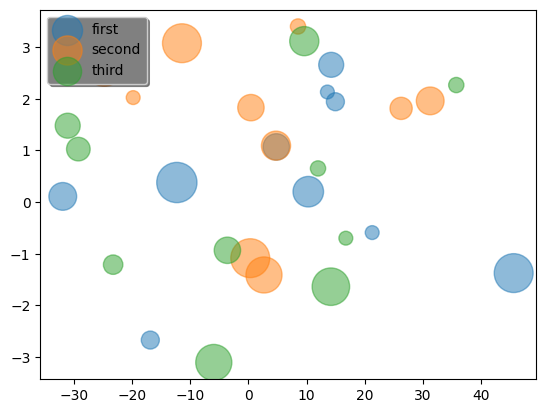

In [51]:
fig, ax = plt.subplots()
for label in ["first", "second", "third"]:
    ax.scatter(np.random.randn(10)*20, np.random.randn(10)*2,
            s=np.random.randint(10,30,10)**2, cmap=plt.cm.Spectral, alpha=0.5, label=label);

#Legend configuring
legend = plt.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.50')

[back to top](#top)

## Sympy

> Ploting functions from text description

In [ ]:
#| export
import sympy

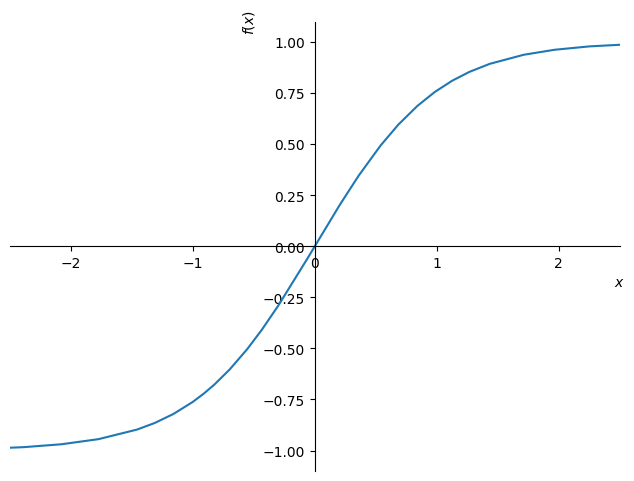

<sympy.plotting.plot.Plot>

In [ ]:
sympy.plot("(exp(x)-exp(-x))/(exp(x)+exp(-x))", xlim=(-2.5,2.5))

[back to top](#top)

## Seaborn

First create a dataFrame with a continuous variable and a categorical variable to group the histograms

In [ ]:
#| export
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

In [ ]:
np.random.rand()
frame = pd.DataFrame(data=np.concatenate((np.random.rand(10,1),np.random.randint(0, high=2, size=(10,1))), axis=1), columns=['indep_var',"group_var"])
frame["group_var"] = pd.Categorical(frame["group_var"].apply(lambda x: "A" if x else "B"))

Or use np.random.choice to select random values in a list-type

In [ ]:
np.random.choice(['A','B'], size=10, replace=True) #, p=None -> prob_distribution

array(['B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'B'], dtype='<U1')

**Barplots and Countplots from SNS**

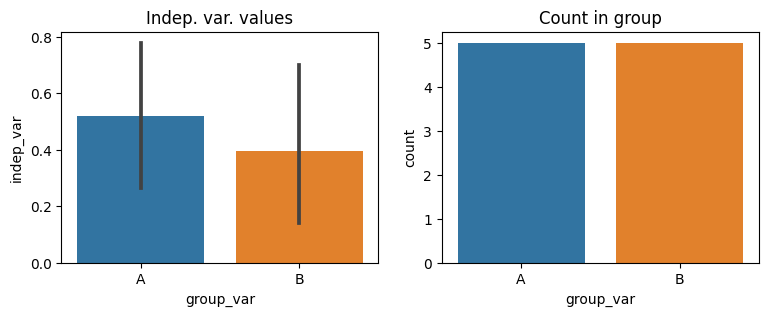

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(9,3))
sns.barplot(data=frame, y='indep_var', x="group_var", ax=axs[0]).set(title="Indep. var. values")
sns.countplot(data=frame, x="group_var", ax=axs[1]).set(title="Count in group");

_Small detour_ - categorical variables' inner code can be accessed through:

In [ ]:
print(frame["group_var"].cat.categories)
frame["group_var"].cat.codes.values

Index(['A', 'B'], dtype='object')


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int8)

**Box plot and distribution**

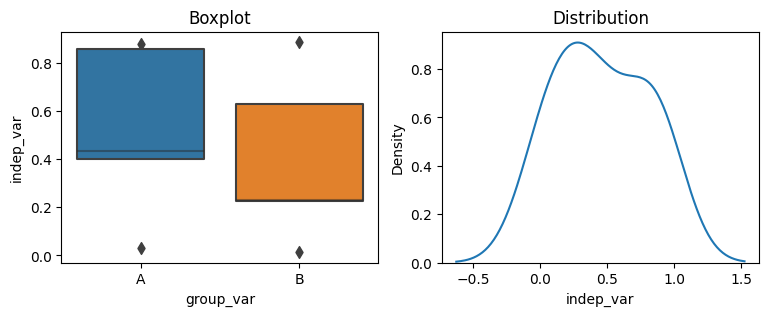

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(9,3))
sns.boxenplot(data=frame, x="group_var", y="indep_var", ax=axs[0]).set(title="Boxplot")
sns.kdeplot(data=frame, x="indep_var", ax=axs[1]).set(title="Distribution");

[back to top](#top)

## PIL

Loading and applying built-in filters and the kernel

In [ ]:
#| export
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageDraw

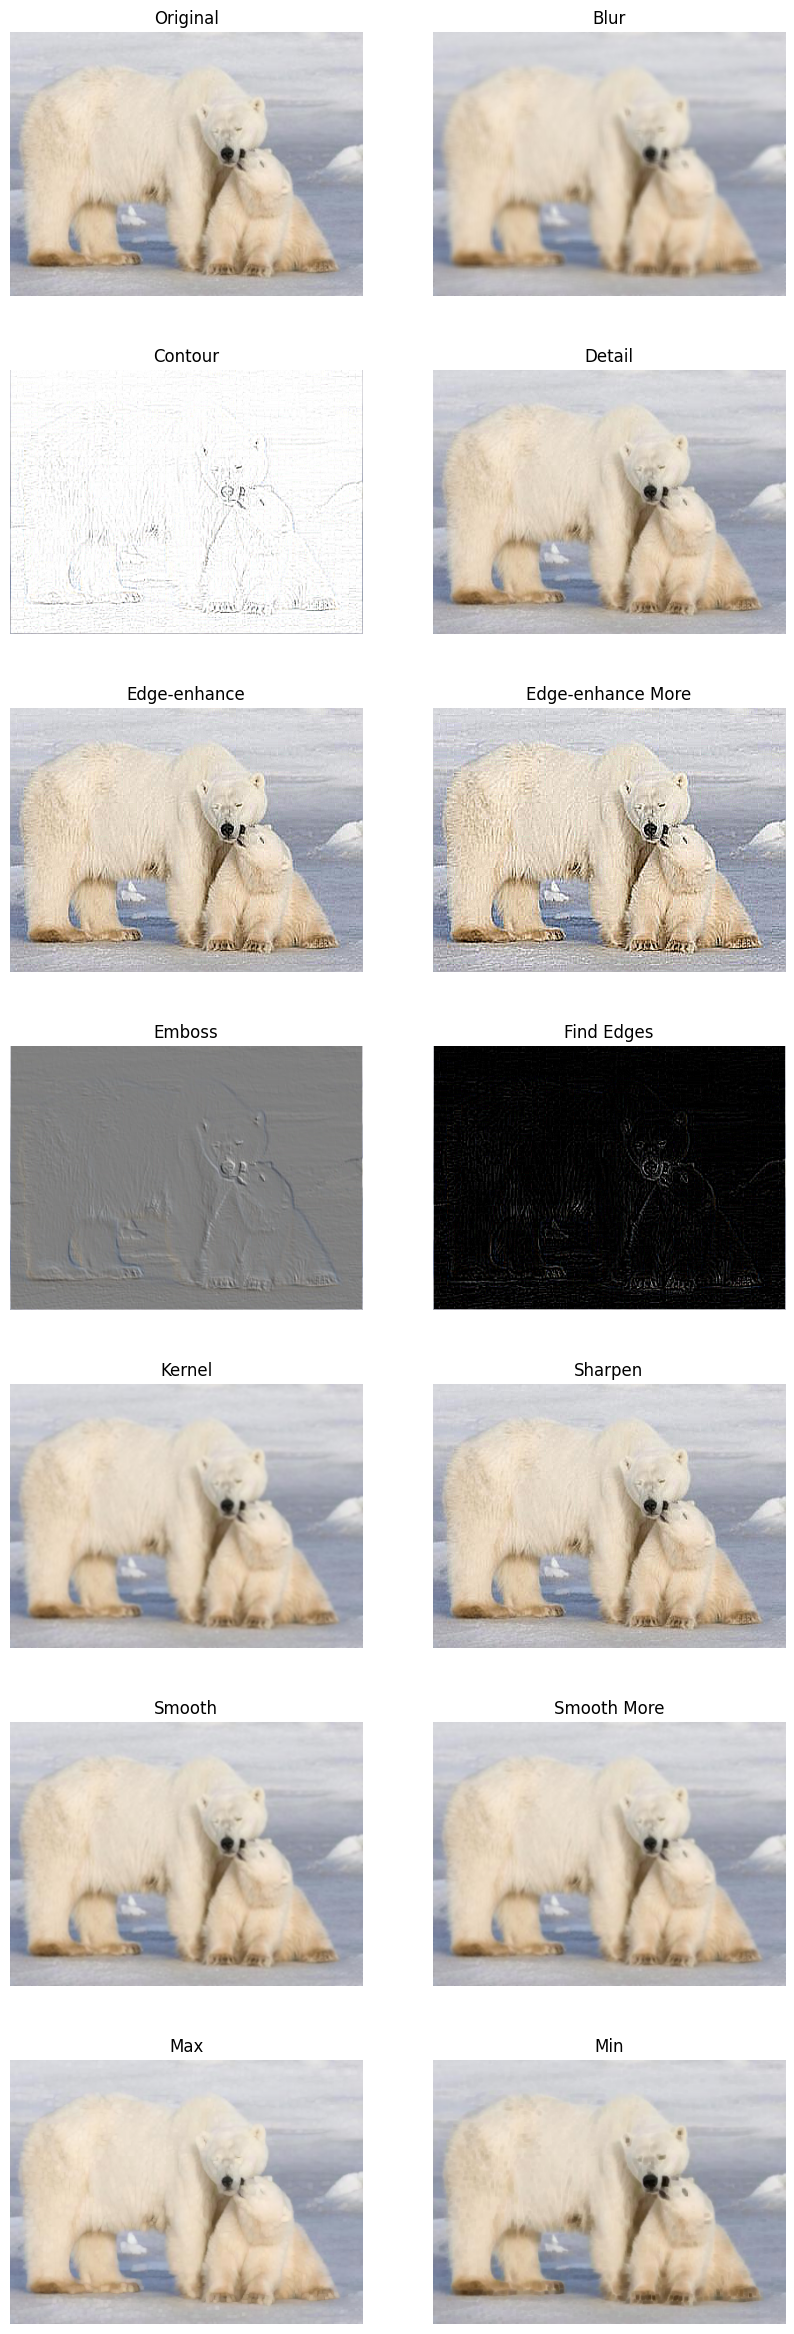

In [7]:
img = Image.open("bears.jpg").resize((400,300))#.rotate(-90)

filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EDGE_ENHANCE_MORE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.Kernel(size=(3,3), kernel=[1,1,1,1,1,1,1,1,1]),
    ImageFilter.SHARPEN,
    ImageFilter.SMOOTH,
    ImageFilter.SMOOTH_MORE,
    ImageFilter.MaxFilter(size=3),
    ImageFilter.MinFilter(size=3)
]

imgs = [(img, 'Original')] + [(img.filter(a_filter), a_filter.name) for a_filter in filters]
plt.figure(figsize=(10, 30))

for i, (image, label) in enumerate(imgs):
    ax = plt.subplot((len(imgs)+1)//2, 2, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

Drawing on the image

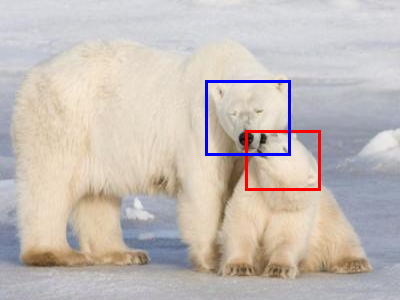

In [14]:
Drawer = ImageDraw.Draw(img)
Drawer.rectangle((245,130,320,190), fill=None, outline="red", width=3)
Drawer.rectangle((205,80,290,155), fill=None, outline="blue", width=3)
img

[back to top](#top)